By: Sharar Sifat

Non-linear Least Squares

Estimated chi squared:  2.50762102198173


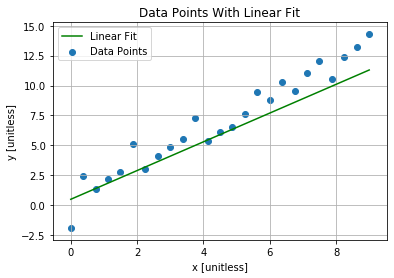

In [ ]:
# Import all commonly used Python packages 

import matplotlib.pylab as plt
import math
import numpy as np

# Defining a linear model function
def linear_model(x, param):
  '''for input slope and intercept return $y= m x + b$'''
  slope, intercept = param
  result = slope*x + intercept
  return result

#opens the file and reads the given points
with open("data_points_assign5.txt","r") as file:
  xValues = []
  yValues = []
  for line in file:
    x, y = line.split()
    xValues.append(float(x))
    yValues.append(float(y))

# Plotting the graph of the linear physical model
y_model_list = []
slope0, intercept0 = 1.2, 0.5
for x in xValues:
  y_model_list.append(linear_model(x,(slope0,intercept0)))

plt.figure()
plt.plot(xValues, y_model_list,"g", label = 'Linear Fit')
plt.scatter(xValues,yValues, label = 'Data Points')
plt.xlabel("x [unitless]")
plt.ylabel("y [unitless]")
plt.grid()
plt.title("Data Points With Linear Fit")
plt.legend()

#function that determines chi squared value
def chi_squared(expected,observed,uncertainty=1):
  chi_squared=0
  for n in range(len(expected)):
    chi_squared += ((expected[n]-observed[n])/uncertainty)**2
  reduced = chi_squared/len(expected)
  return(reduced)

# Prints the calculated chi squared value
print("Estimated chi squared: ", chi_squared(y_model_list,yValues))

The linear model above isn't completely accurate, as the line of best fit does not perfectly match all the given data points. The chi squared value is also quite large, as it has a value of 2.507. This optimal chi squared value should be zero, which would give a perfect fit. It is not quite certain why the fit diverges from the data to the extent that it does.  

Min chi squared value:  0.8647975457609353


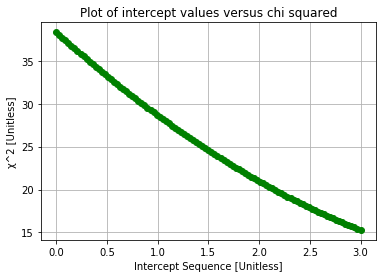

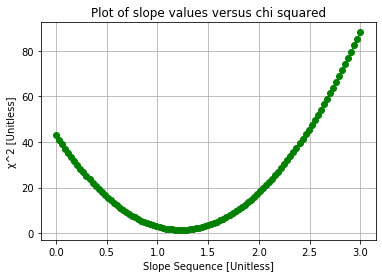

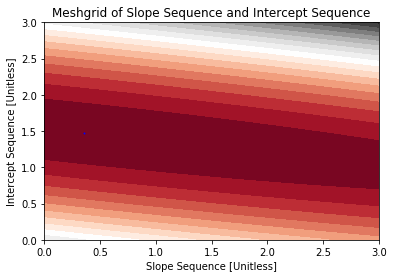

In [ ]:

# Parameter domain as given
slope_sequence = np.linspace(0.0, 3.0, 101)
intercept_sequence = np.linspace(0.0, 3.0, 101)
rchi2 = np.ndarray(shape=(101, 101))
#Value of chi squared is a minimum in the given range of parameter domains
for i in range(len(slope_sequence)):
  for j in range(len(intercept_sequence)):
    y_model_list = list_model((slope_sequence[i], intercept_sequence[j]))
    rchi2[i, j] = chi_squared(y_model_list, yValues)

chi2_min = np.unravel_index(np.argmin(rchi2), rchi2.shape)

# printing the minimum value of chi squared
print("Min chi squared value: ", rchi2[chi2_min])

xx, yy = np.meshgrid(slope_sequence, intercept_sequence)
z = rchi2

#plot of chi squared as a function of the intercept_sequence with the minimum point marked
plt.figure()
plt.grid()
plt.title("Plot of intercept values versus chi squared")
plt.plot(intercept_sequence, rchi2[min_index_2d[0]],"g",marker="o")
plt.xlabel("Intercept Sequence [Unitless]")
plt.ylabel("χ^2 [Unitless]")

#plot of chi squared as a function of the slope_sequence with the minimum point marked
plt.figure()
plt.grid()
plt.title("Plot of slope values versus chi squared")
plt.plot(slope_sequence, rchi2[:,min_index_2d[1]],"g",marker="o")
plt.xlabel("Slope Sequence [Unitless]")
plt.ylabel("χ^2 [Unitless]")

#The value of the minimum chi squared was found to be 0.86, while the value for the estimated chi squared was found to be 2.50
#The values of the slope and intercept respectively were found to be 0.75 and 0.21, which were less than the estimate in part b.


#Contour plot for intercept and slope 
plt.figure()
plt.contourf(xx, yy, rchi2, 20, cmap='RdGy')
plt.scatter(intercept_sequence[chi2_min[1]], slope_sequence[chi2_min[0]], rchi2[chi2_min], c="b", marker="o")
plt.title("Meshgrid of Slope Sequence and Intercept Sequence")
plt.xlabel("Slope Sequence [Unitless]")
plt.ylabel("Intercept Sequence [Unitless]")
plt.show()

The value of chi squared obtained is less than that obtained in part d. This is likely due to a more accurate model to the data being created in comparison to that in part b. In the plot of chi squared as a function of slope_sequence, a minimum was observed. However, in the plot of chi squared as a function of intercept_sequence, no minimum was observed. This may be due to the y-intercept not being effectively found utilizing the methods provided. 

Curve Fitting Using scipy.optimize Package

In [ ]:
# Importing necessary packages 

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt 

# Part a:

# reading the data from data_points_assign5.txt and putting the x and y values into respective lists

#initial empty x and y data lists 

xData1List = []
yData1List = []

# this opens the .txt file, and the read mode is utilize

file = open("data_points_assign5.txt", "r")

# reads every single line of the .txt file
content = file.readlines()

# for each line in the .txt file, the entries are split into individual lists
# next, the data in the first column of each list is put into the x data, but first converted to a float from a string
# the data in the second column of each list is put into the y data, but first converted to a float from a string 
# the idea for the algorithm to add the values from the .txt file and append them to the list was from: https://www.youtube.com/watch?v=oAFkPMbwRVY

for fileLine in content:
    ind_value = fileLine.split()
    xData1List.append(float(ind_value[0]))
    yData1List.append(float(ind_value[1]))
    
# both lists are converted to arrays 
xData1Array = np.array(xData1List)
yData1Array = np.array(yData1List)

# the function below is a linear model taking x and param as entries
# param is a set of two components: slope, and y_int
# the function returns a linear function taking into account the three entries

def linear_model(x,param):
    slope, y_int = param
    result = slope*x + y_int
        
    return result

# the function below is a chi squared function that must be minimized in order to find the smallest slope and y_int values
# slope and y_int are again the two components for param 
# the chi squared function returns the sum of the linear model data minus the initially value squared

def chi_sq(param,x,y):
    slope, y_int = param
    y_model = linear_model(x,param)
    y_data = y 
    value = y_model-y_data 
    value2 = np.sum(value**2)
    
    return value2

# initial guess for the minimize function

initial_guess = [2,-2]

# the function below is a minimize function utilizing the Nelder-Mead algorithm 
# it takes the chi squared function, the initial guess and both data arrays as inputs 

minima = minimize(chi_sq,initial_guess,(xData1Array,yData1Array),method="Nelder-Mead")

# this yields both the optimized slope and optimized y intercept from the minimize function above 

optimizedSlope = minima.x[0]
optimizedYint = minima.x[1]

print("The optimized slope is",optimizedSlope,"and the optimized y-intercept is",optimizedYint)


The optimized slope is 1.4659340984125389 and the optimized y-intercept is 0.36442412624640774


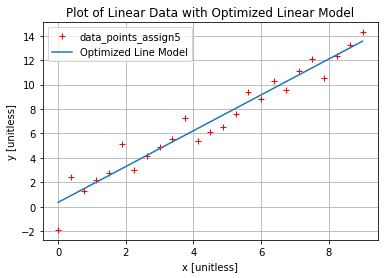

In [ ]:
# Part b:

# an empty list for the optimized y values that will be calculated utilizing the linear_model function above with the 
# optimized y-intercept and slope values 

OptYArray = []

# the following for loop takes the individual x points from the data array given in the problem, and uses them in addition to the 
# optimized y-intercept and optimized slope in the linear model function to plot the optimized y values and insert them into 
# the empty array above

for xPoints in xData1Array:
    OptYpt = linear_model(xPoints,(optimizedSlope,optimizedYint))
    OptYArray.append(OptYpt)

# the code below plots the original x and y data points, as well as the linear fit of the data 
plt.plot(xData1Array,yData1Array,"r+",label="data_points_assign5")
plt.plot(xData1Array,OptYArray,label="Optimized Line Model")
plt.title("Plot of Linear Data with Optimized Linear Model")
plt.xlabel("x [unitless]")
plt.ylabel("y [unitless]")
plt.legend()
plt.grid()
plt.show()

The figure above clearly indicates that the minimize function was effective in finding a linear fit to the data points. Although the y-intercept in the trendline is not the same as the red data point, the line is still an accurate description of the data presented.

The optimized D value is 2.2926156577539594 and the optimized b value is 0.49628665720825577


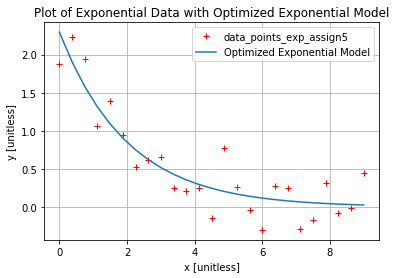

In [ ]:
# Part c:

# This part is a repeat of parts a and b above; however, a different dataset is utilized 
# rather than being data that seems to be linear in nature, this data is exponential in nature 
# two empty lists are again defined below in order to add the read-in .txt file data to them 

xData2List = []
yData2List = []

# the file is opened and read using the "read" mode 

file = open("data_points_exp_assign5.txt", "r")

# each line of the .txt file is read. The process is identical to that explained above in part a. Refer to the description above
# for more in-depth information if confused. 

content = file.readlines()
for line in content:
    data_val = line.split()
    xData2List.append(float(data_val[0]))
    yData2List.append(float(data_val[1]))
xData2Array = np.array(xData2List)
yData2Array = np.array(yData2List)


# an exponential model is defined taking x and "param" as inputs 
# "param" is a combination of two values: D and b
# the function returned is exponential utilizing, x, D, and b 

def exp_model(x,param):
    D,b = param
    result2 = D*np.exp(-b*x)
    return result2

# the chi squared function below is identical to that defined above minus different parameters being utilized.
# rather than being slope and y_int, the parameters are D and b 

def chi_sq2(param,x,y):
    D,b = param
    y_model = exp_model(x,param)
    y_data = y 
    value = y_model-y_data 
    returnValue = np.sum(value**2)
    return returnValue

# the initial guess valus for the minimize function 
initial_guess = [10,0.4]

# the minimize function takes the chi squared function, the initial guess, and the two initial data lists above as inputs
# the function finds the optimized D and optimized b values 
minima2 = minimize(chi_sq2,initial_guess,(xData2Array,yData2Array),method="Nelder-Mead")
optimizedD = minima2.x[0]
optimized_b = minima2.x[1]

# an empty list where the optimized y data is inserted once the exponential function is utilized taking into account the optimized D and b values
OptYArray2 = []

print("The optimized D value is",optimizedD,"and the optimized b value is",optimized_b)

# the loop below takes the optimized D and b values, as well as the x values from the initially provided data array above
# and appends the y values which are yielded utilizing the exponential function 

for xPoint in xData2Array:
    OptYpts = exp_model(xPoint,(optimizedD,optimized_b))
    OptYArray2.append(OptYpts)

# the code below plots the exponential data points as well as the optimized curve corresponding to the data 
plt.plot(xData2Array,yData2Array,"r+",label="data_points_exp_assign5")
plt.plot(xData2Array,OptYArray2,label="Optimized Exponential Model")
plt.title("Plot of Exponential Data with Optimized Exponential Model")
plt.xlabel("x [unitless]")
plt.ylabel("y [unitless]")
plt.legend()
plt.grid()
plt.show()

It is apparent that the exponential model utilizing the optimized d and B values is quite accurate in comparison to the provided data. Therefore, the data can in fact be best modeled exponentially. It is also evident from both figures above, that the minimize function can be utilized to effectively model linear and non-linear datasets. 

The optimized N0 value is 1656.1164424017365  counts, and the half-life is 2.8362029906637156 minutes.


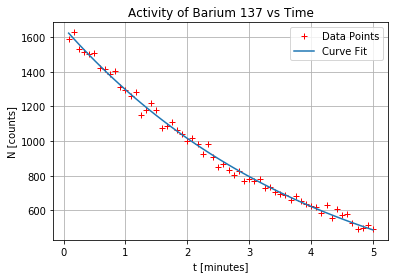

In [ ]:
# Part d:

# the same procedure as in parts a and c is done below. To avoid redundancy, please refer to comments above to find description
# the algorithm is identical except for slightly different names for the lists

xDecayList = []
yDecayList = []

file = open("decay.txt", "r")
content = file.readlines()
for line in content:
    list_values = line.split()
    xDecayList.append(float(list_values[0]))
    yDecayList.append(float(list_values[1]))
xDecayArray = np.array(xDecayList)
yDecayArray = np.array(yDecayList)

# an exponential decay function is defined below, which takes N0 and half life as parameters. t is the other argument in the function
# the activity values yielded from the decay function are returned
def decay(t,param):
    N0,half = param
    result_N = N0*np.exp((-t*np.log(2))/half)
    return result_N

# the chi-squared function is again defined, and the algorithm is identical to the others above, except for N0, N, half-life, and t being arguments
def chi2(param,t,N):
    N0,half = param
    N_model = decay(t,param)
    N_data = N
    value = N_model-N_data 
    second_value = np.sum(value**2)
    return second_value

# initial guess for the decay function 
initial_guess = [100,0.4]

# the minimize function below takes the chi2 function, initial guess, and initial decay lists above as arguments
# again the Nelder-Mead method is utilized. The optimized N0 and half-life values are returned 

minima = minimize(chi2,initial_guess,(xDecayArray,yDecayArray),method="Nelder-Mead")
optimizedN0 = minima.x[0]
optimized_half = minima.x[1]

print("The optimized N0 value is",optimizedN0," counts, and the half-life is",optimized_half,"minutes.")

# empty activity array which will be filled utilizing the for loop below

OptNArray = []

# the for loop below takes the values from the original x decay array, the optimized N0 value, and the optimized half-life value
# to find the values corresponding to the optimized activity rates utilizing the decay function
for tPoint in xDecayArray:
    OptN = decay(tPoint,(optimizedN0,optimized_half))
    OptNArray.append(OptN)

# the optimized activity and original activity values are plotted utilizing the code below:

plt.plot(xDecayList,yDecayList,"r+",label="Data Points")
plt.plot(xDecayList,OptNArray,label="Curve Fit")
plt.legend()
plt.title("Activity of Barium 137 vs Time")
plt.xlabel("t [minutes]")
plt.ylabel("N [counts]")
plt.grid()
plt.show()

The figure above is for the activity of Barium 137 as a function of time. The activity is clearly decreasing with time, which is expected to physically happen. The curve fit very closely follows the datapoints for the activity values, again proving that the minimize function can effectively model exponential data points. The optimized hal life of Barium 137 was found to be 2.84 minutes. This is a logical answer, as this point in the graph is approximately where the activity of Barium 137 is halved. At this time, the activity is close to 800 counts, which is approximately half of the maximum activity value of the original activity rate, N0, which had an optimized value of 1656 counts. 

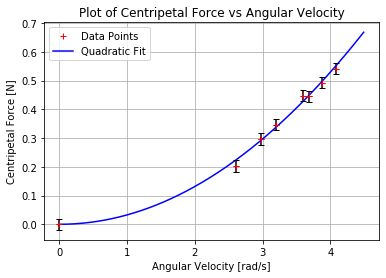

The a term, which equals m*R, is 0.03263429095650897 and the b term, which is the exponent, is 2.010275979571497


In [ ]:
# Part e:

# the curve_fit routine is being imported here 

from scipy.optimize import curve_fit

# the .txt file is 3 columns this time, instead of 2. The general algorithm is the same as with the previous times with two columns
# however, there are three data value types that will be appended to their respective arrays rather than two types.

omegaList = []
F_cList = []
errorList = []

# the .txt is opened and read in the same manner as above 

file = open("centripetal.txt", "r")
content = file.readlines()

# for the content in the file, each line is split and turned into its own list
# from the list of three elements (corresponding each to one of the three data values) each value is appended to the empty lists above
for line in content:
    reading = line.split()
    omegaList.append((reading[0]))
    F_cList.append((reading[1]))
    errorList.append((reading[2]))
    
# the .pop function below is to remove the string title for each column. This is due to the fact that arrays cannot take in different data formats 
omegaList.pop(0)
F_cList.pop(0)
errorList.pop(0)

# the string values of each data value is now inputted into the arrays 

omegaArray = np.array(omegaList)
F_cArray = np.array(F_cList)
errorArray = np.array(errorList)

# empty arrays that will be filled with the float versions of the string data values from the arrays above
omegaFarray = []
F_cFarray = []
errorFarray = []

# the for loop goes through each of the 8 elements in the 3 string arrays above, turns them into floats, and appends them to the float lists
for i in range(8):
    omegaFarray.append(float(omegaArray[i]))
    F_cFarray.append(float(F_cArray[i]))
    errorFarray.append(float(errorArray[i]))

# a quadratic model function taking into account constants a, b, and then value x as parameters 
def quadratic(x,a,b):
    return a*x**b

# this removes the first element from the float omega aray. This first element was 0. A divide by zero warning was displayed when running the code with this 0 value
# as a result, after research it was determined that a very small number that could approximate to zero could replace 0 instead
# the value chosen was 1e-8. 
# the for loop below adds each other element from the float omega array (other than 0) to the new array containing this 1e-8 value

omegaFarray.pop(0)
testingList = [1e-8]
for i in omegaFarray:
    testingList.append(i)
omegaFarray = np.array(testingList)

# the curve fit algorithm is utilized, taking into account the quadratic function, omega float array, and the float centripetal force array as inputs
# the function returns the optimized a and b values 

fit = curve_fit(quadratic,omegaFarray,F_cFarray)

# a numpy arange for the x-values, which are used to create the smooth curve
xFit = np.arange(0,4.5,0.01)

# the functions below plot the curve fit values with the original data points. The centripetal force error values are also plotted as the black error bars
plt.plot(omegaFarray,F_cFarray,'r+',label='Data Points')
plt.plot(xFit,quadratic(xFit, fit[0][0],fit[0][1]),'b',label='Quadratic Fit')
# note: the error for the centripetal force is the same for each data point, so the valu of 0.0196 was just included
plt.errorbar(omegaFarray,F_cFarray,yerr=0.0196,fmt='r+',ecolor='black',capsize=3)
plt.grid()
plt.legend()
plt.title('Plot of Centripetal Force vs Angular Velocity')
plt.xlabel('Angular Velocity [rad/s]')
plt.ylabel('Centripetal Force [N]')
plt.show()

print("The a term, which equals m*R, is",fit[0][0],"and the b term, which is the exponent, is",fit[0][1])


The quadratic model denoted by F_c = mRw^2 (Equation 12 in the manual) fits the data well. This is proven by the optimal exponent value yielded, which was 2.0103. The exponent matches completely to the one in Equation 12. In addition, the curve generated with a quadratic fit goes through most of the data points, except for the second one. However, the quadratic fit line is within the error of the point as shown by the black error bar. Although not entirely accurate, the quadratic fit does match the data points quite well. Since the exponent of the quadratic fit is the same as with Equation 12, the model for F_c in Equation 12 does fit the data.

The mass of 200 grams and the radius of 18 cm are consistent with the parameters in the curve fit due to the m*R value obtained above being 0.0326 kg*m, which is very close to 0.036 kg*m. 0.036 kg*m is the value which is generated by multiplying the 200 gram mass with the 18 cm radius. 

Taylor Series and Finite Difference Methods

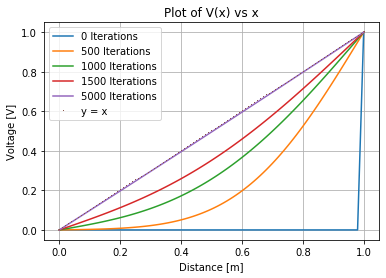

After 0 iterations the numerical solution has a chi-squared value of 32.095. This is very far from the analytical solution
After 500 iterations the numerical solution has a chi-squared value of 7.9453735203348534. This is still very far from the analytical solution.
After 1000 iterations the numerical solution has a chi-squared value of 2.944091121283878. This is quite far from the analytical solution.
After 1500 iterations the numerical solution has a chi-squared value of 1.0983967013758484. This is still far from the analytical solution.
After 5000 iterations the numerical solution has a chi-squared value of 0.0010966581329774298. This is very close to the analytical solution, and the difference between the two is so small that they can be approximated as each other.


In [ ]:
import matplotlib.pylab as plt
import numpy as np
#Exercise 3
#The number of points
N = 100 
#Total distance
d = 1 # m 
#Distance between each point
delta = d/N
#Voltage at 0 m
V_0 = 0 # V
#Voltage at 1 m
V_N = 1 # V

#List for initalizing voltages
xList = []
VList = []

#List for storing Chi-squared values 
RList = []
#Set starting position to x = 0
x = 0 

# Intialize each point at 0 V if x < 1 and 1 if x = 1 and store them in an array
for value in range(N+1):

  xList.append(x)
  if value == 100:
    VList.append(V_N)
  else: 
    VList.append(V_0)
  if x == 0:
    # Create the array
    Voltage = np.array([xList[value],VList[value]])
  else:
    #Add to the array
    Voltage = np.append(Voltage,[xList[value],VList[value]])
  # Update position  
  x += delta   

#Slice the arrays for position and voltage
s = slice(1,202,2)
ss = slice(0,201,2)

#Create line  y = x
x = np.linspace(0,1,101)
y = x

#Use the Laplace equation to update the voltage 5000 times.
for j in range(5001):
  #Start at the first Voltage after V_0
  i = 3
  #Update each position with in the array with the Laplace equation.
  while i < 200:
    Voltage[i] = (Voltage[i-2] + Voltage[i+2])/2
    i+=2
  # Graph certain iterations of the updated voltages  
  if (j == 0 or j % 500 == 0)and j < 2000:
    plt.plot(Voltage[ss],Voltage[s],label = "{} Iterations".format(j))
    #Calculate the chi-sqaured value for each of these graphs and store.
    diff = (y - Voltage[s])**2
    R = sum(diff)
    RList.append(R)

#Calculate the final chi-sqaured value for each of these graphs and store.
diff = (y - Voltage[s])**2
R = sum(diff)
RList.append(R)

#Plot the graphs
plt.plot(Voltage[ss],Voltage[s],label = "{} Iterations".format(j))
plt.plot(x,y,",",label = "y = x")
plt.grid()
plt.legend()
plt.xlabel("Distance [m]")
plt.ylabel("Voltage [V]")
plt.title("Plot of V(x) vs x")
plt.show()

#Print results.
print("After 0 iterations the numerical solution has a chi-squared value of {}. This is very far from the analytical solution".format(RList[0]))
print("After 500 iterations the numerical solution has a chi-squared value of {}. This is still very far from the analytical solution.".format(RList[1]))
print("After 1000 iterations the numerical solution has a chi-squared value of {}. This is quite far from the analytical solution.".format(RList[2]))
print("After 1500 iterations the numerical solution has a chi-squared value of {}. This is still far from the analytical solution.".format(RList[3]))
print("After 5000 iterations the numerical solution has a chi-squared value of {}. This is very close to the analytical solution, and the difference between the two is so small that they can be approximated as each other.".format(RList[4]))